# 1.Data Extraction

## (1).Accessible data set link

### https://www.kaggle.com/camnugent/california-housing-prices

## (2).Dataset Description

#### The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data.
#### My object is to get the relationship between some important variables.

### ---Variables Description

####     longitude: A measure of how far west a house is; a higher value is farther west

####     latitude: A measure of how far north a house is; a higher value is farther north

####     housingmedianage: Median age of a house within a block; a lower number is a newer building

####     total_rooms: Total number of rooms within a block

####     total_bedrooms: Total number of bedrooms within a block

####     population: Total number of people residing within a block

####     households: Total number of households, a group of people residing within a home unit, for a block

####     median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

####     medianhousevalue: Median house value for households within a block (measured in US Dollars)

####     ocean_proximity:  Location of the house w.r.t ocean/sea

## (3).Data Download

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

import pandas as pd

df = pd.read_csv('housing.csv')

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [2]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 20640 rows and 10 columns


# 2.Data clean up


In [3]:
df.dropna(axis=0,inplace=True)

In [4]:
df.head()
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 20433 rows and 10 columns


# 3.Data visualization

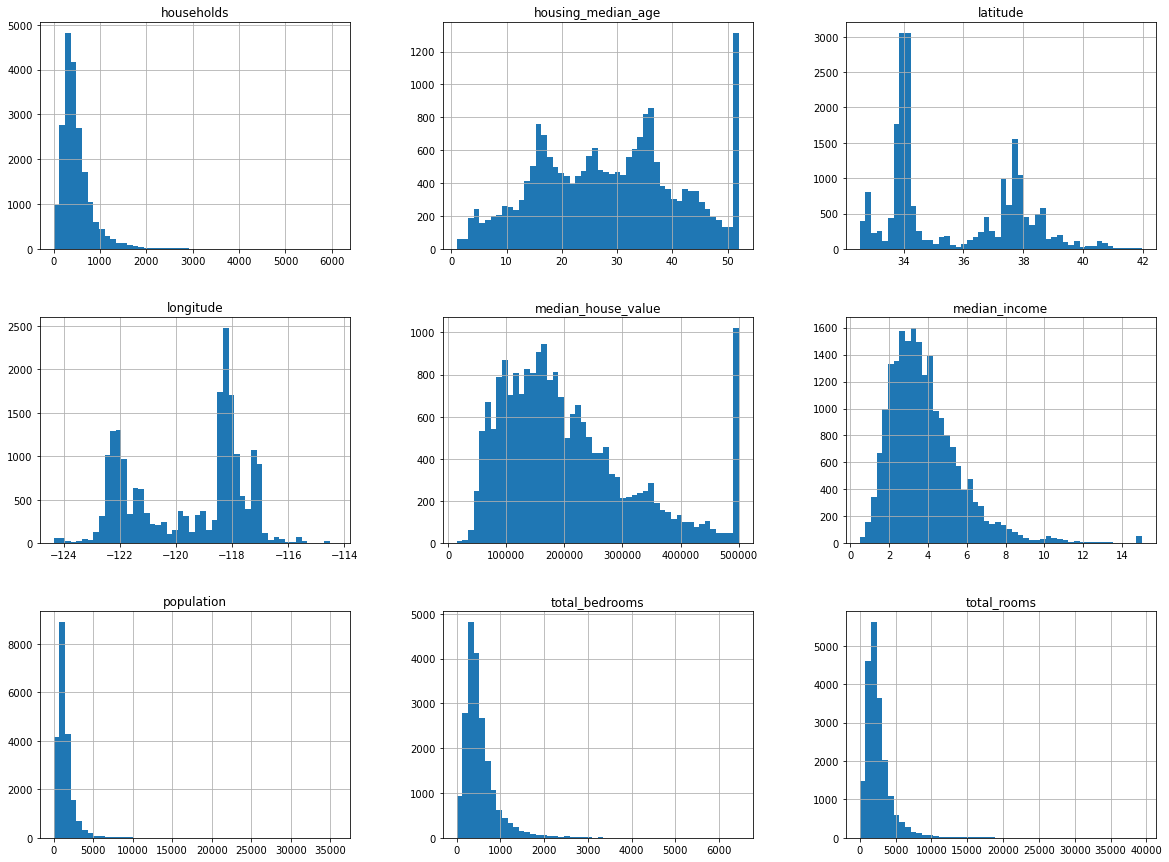

In [5]:
data = df.hist(bins=50, figsize=(20,15))
data = plt.savefig("Histogram_Plots")
plt.show()

#### Looking at the histogram of all the variables, we can clearly see that most of them are continuous.
#### The highest number of houses with a median age of 50 years and the highest number of houses with a median price of $500,000

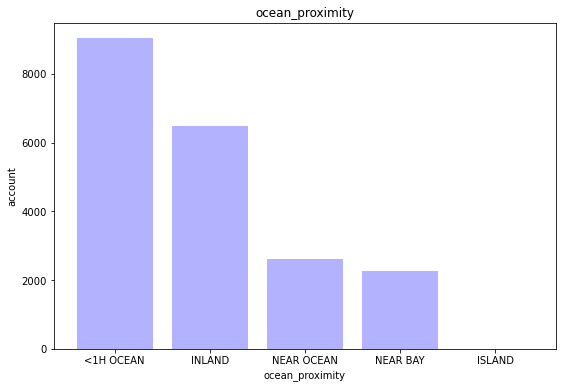

In [6]:
plt.figure(figsize=(9,6))
ty = df['ocean_proximity'].value_counts()[:10]
plt.bar(ty.index,ty.values,color="b",alpha=0.3)
plt.title("ocean_proximity")
plt.xlabel("ocean_proximity")
plt.ylabel("account")
plt.show()

#### From the above histogram of the distance between houses and Ocean, we can see that the number of houses with a distance of less than 1 hour from Ocean is the highest, and on the contrary, the number of houses in Island is the lowest

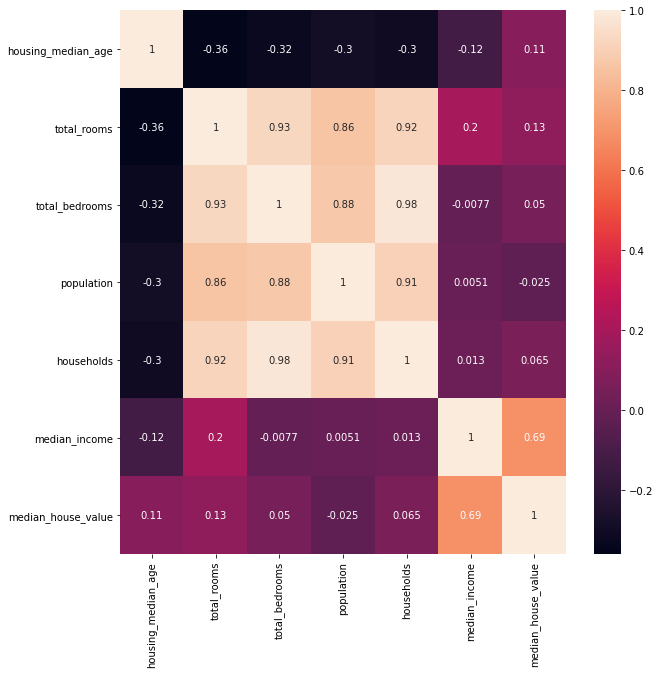

In [7]:

corr = df.iloc[:,2:,].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True)
plt.show()

####  As we can see from the correlation chart above, household and population show a very high positive correlation with total-bedrooms, and total-bedrooms and total-rooms also show a relatively high positive correlation. In comparison, median income has a higher correlation with median house price

# 4.Descriptive/Predictive analytics 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  int64  
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


In [10]:

predictdata = ['longitude','latitude','population','total_rooms',
              'housing_median_age','median_income']
X= df[predictdata]
X.head()

,longitude,latitude,population,total_rooms,housing_median_age,median_income
0,-122.23,37.88,322,880,41,8.3252
1,-122.22,37.86,2401,7099,21,8.3014
2,-122.24,37.85,496,1467,52,7.2574
3,-122.25,37.85,558,1274,52,5.6431
4,-122.25,37.85,565,1627,52,3.8462


In [11]:
y = df.median_house_value
y[:2]

0    452600
1    358500
Name: median_house_value, dtype: int64

##### Choose the DecisionTreeRegressor

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y ,random_state = 0)

In [13]:
model = DecisionTreeRegressor()

In [14]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [15]:
predictions = model.predict(X_test)
predictions[:2]

array([120600., 126200.])

In [24]:
print(mean_absolute_error(y_test,predictions))
print(model.score(X_test,y_test))

32474.088651399496
0.6445839433677515


##### Choose the Random Forest Regressor

In [32]:

final_predict_model = RandomForestRegressor(random_state =1)
final_predict_model.fit(X_train,y_train)
predictions = final_predict_model.predict(X_test)


print(mean_absolute_error(y_test,predictions))
print(final_predict_model.score(X_test, y_test))

32474.088651399496
0.8089755735493959


#### By modeling, the final model score of the model of random forest is 0.8089.The final score of the model of decision tree is 0.644.In comparison, the model of random forest is more suitable.